In this cell, we are trainig the model with the features yet without extra steps

1. **Importing necessary libraries**: We import pandas for data manipulation, sklearn's `train_test_split` for splitting our data into training and testing sets, `LogisticRegression` for our model, and several metrics for evaluating our model's performance.

2. **Loading the data**: We load our dataset 'final_cleaned_dataset.csv' into a pandas DataFrame.

3. **Preparing the features and target variable**: We define our feature set `X` to be the columns 'num_words', 'num_chars', and 'num_sentences' from our DataFrame. Our target variable `y` is the 'v1' column of the DataFrame.

4. **Encoding the target variable**: If our target variable is categorical (non-numeric), we need to encode it into numeric form. We use sklearn's `LabelEncoder` to do this.

5. **Splitting the data**: We split our data into training and testing sets, with 80% of the data going to the training set and 20% going to the testing set.

6. **Initializing the Logistic Regression model**: We create an instance of the `LogisticRegression` model.

7. **Training the model**: We fit our model to the training data.

8. **Making predictions**: We use our trained model to make predictions on our testing data.

9. **Calculating evaluation metrics**: We calculate several metrics to evaluate our model's performance, including accuracy, precision, recall, and the confusion matrix.

10. **Printing the metrics**: Finally, we print out these metrics to see how well our model performed.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('final_cleaned_dataset.csv')

# Prepare the features and target variable
X = df[['num_words', 'num_chars', 'num_sentences']]
y = df['v1']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8869955156950673
Precision: 0.6111111111111112
Recall: 0.44
Confusion Matrix:
[[923  42]
 [ 84  66]]


# Necessary Imports

In [20]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [23]:
#Loading data
data = pd.read_csv("final_cleaned_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   phone          5572 non-null   object 
 1   email          5572 non-null   object 
 2   name           5572 non-null   object 
 3   age            5572 non-null   float64
 4   v1             5572 non-null   object 
 5   v2             5572 non-null   object 
 6   num_words      5572 non-null   int64  
 7   num_chars      5572 non-null   int64  
 8   num_sentences  5572 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 391.9+ KB


In [24]:

data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,phone,email,name,age,Target,Text,num_words,num_chars,num_sentences
0,298-598-3142,dcobleigh0@narod.ru,Debbie Cobleigh,79.0,ham,"Go until jurong point, crazy.. Available only ...",20,111,8
1,580-220-1043,tghelardi1@purevolume.com,Thacher Ghelardi,30.0,ham,Ok lar... Joking wif u oni...,6,29,6
2,652-576-2335,mboxen2@shareasale.com,Mariquilla Boxen,72.0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,1
3,550-482-8459,mburgisi3@chron.com,Marcelle Burgisi,26.0,ham,U dun say so early hor... U c already then say...,11,49,6
4,820-694-9474,gdi4@myspace.com,Grange Di Lucia,24.0,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,0


<Figure size 1200x800 with 0 Axes>

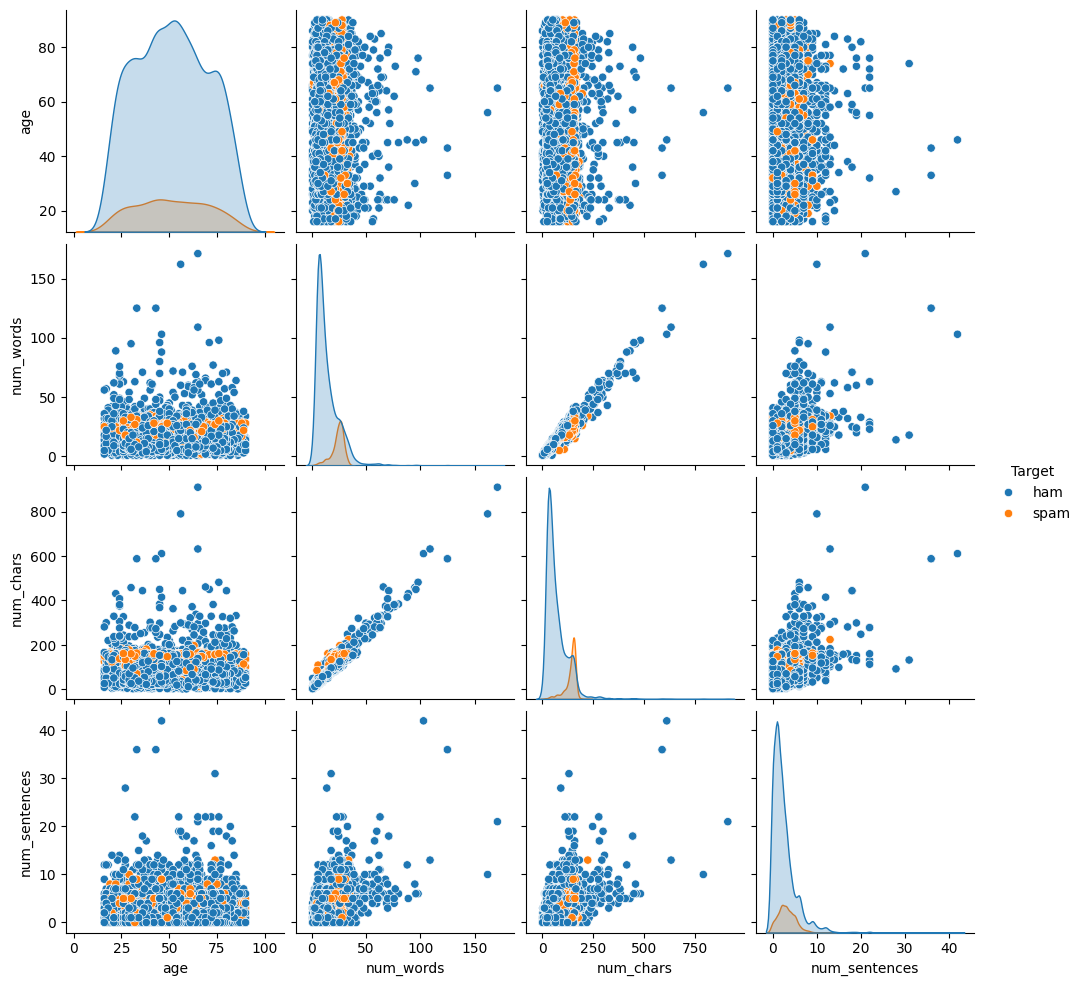

In [26]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target")
plt.show(fg)

# OUtlier detection

In [29]:
# Dropping the outliers. 
data = data[(data["num_chars"]<350)]

<Figure size 1200x800 with 0 Axes>

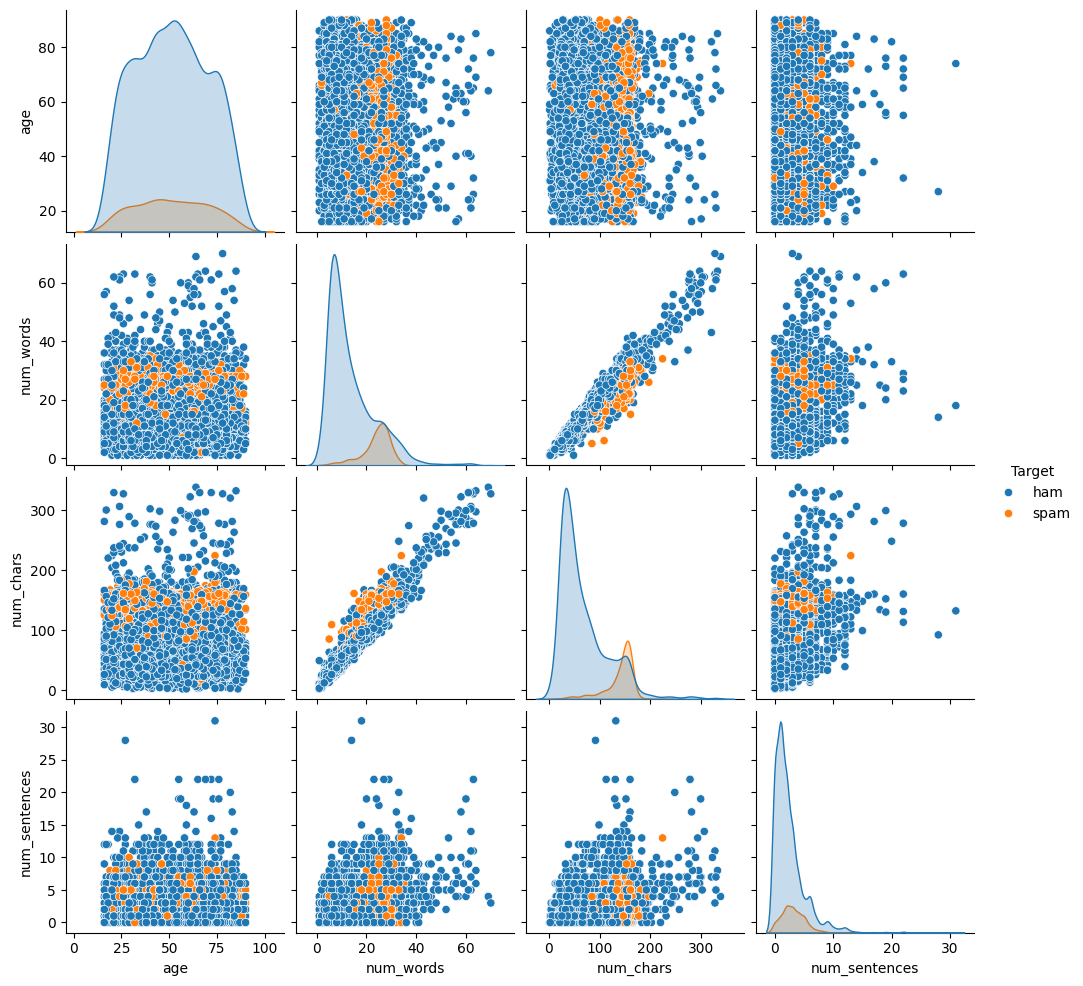

In [30]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target")
plt.show(fg)

In [31]:
#Lets have a look at a sample of texts before cleaning
print("\033[1m The First 5 Texts:\033[0m",*data["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [32]:
# Defining a function to clean up the text
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["Text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m The First 5 Texts:\033[0m",*data["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_38979/2341281329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Clean_Text"] = data["Text"].apply(Clean)


# Tokenization 

In [33]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m The First 5 Texts:\033[0m",*data["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_38979/1426788946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)


# Stop words removal

In [34]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_38979/974477655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)


In [35]:
import nltk
nltk.download('wordnet')


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

# Text Lemmatization

In [36]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m The First 5 Texts after lemmatization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemmatization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_38979/3816536670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)


In [37]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


# Vectorization

In [38]:
#Changing text data in to numbers. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature 
X.dtype

dtype('float64')

In [39]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_38979/3498454140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Target"] = label_encoder.fit_transform(data["Target"])


# Data Splitting

In [40]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data["Target"] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [41]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [42]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.967552 
RandomForest: 0.975214 
KNeighbours: 0.911450 
SVC: 0.974086 


In [43]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


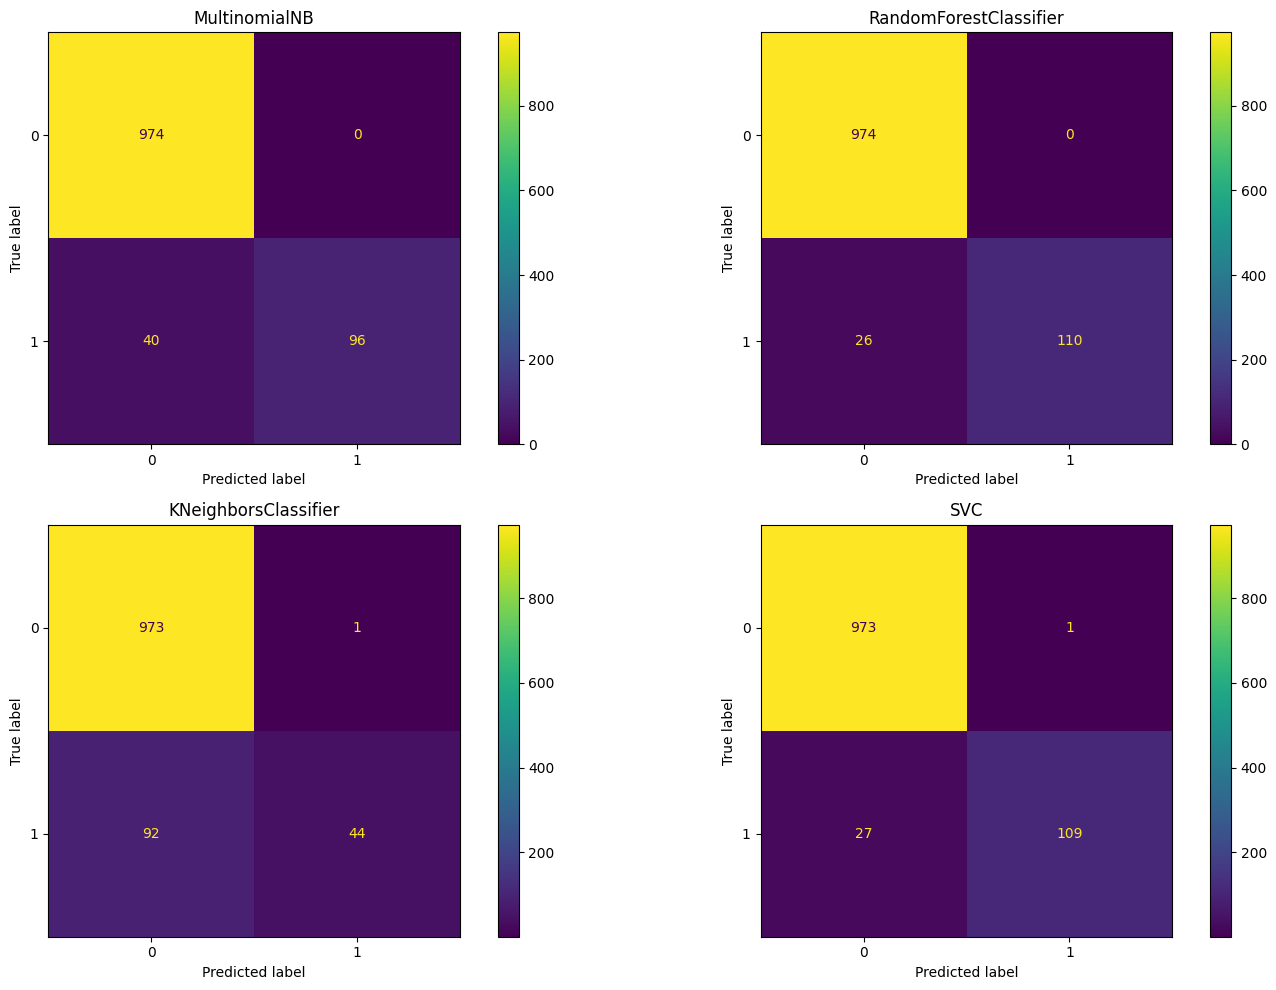

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


for cls, ax in zip(classifiers, axes.flatten()):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, cls.predict(X_test))
    
    # Create the ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
    
    # Plot it on the specified axes
    disp.plot(ax=ax)
    
    # Set the classifier name as the title
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.show()


In [54]:
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame and 'Target' contains binary labels for spam/ham
# where 1 represents spam and 0 represents ham.

df = pd.read_csv('final_cleaned_dataset.csv')

# Create a frequency table
frequency_table = pd.crosstab(index=df['v1'], columns=[df["num_words"], df["num_chars"]])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(frequency_table)

# Output the results
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the p-value
alpha = 0.05  # significance level
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("We reject the null hypothesis (H0), suggesting the class distribution is not as expected by chance.")
else:
    print("We fail to reject the null hypothesis (H0), suggesting the class distribution is as expected by chance.")


Chi-Square value: 1552.184400894598
P-value: 1.0289937409472893e-270
Degrees of Freedom: 81
Expected frequencies:
[[3.55034099e+01 3.55034099e+01 6.84090093e+01 1.71455492e+02
  3.08273510e+02 3.64559404e+02 3.35117552e+02 3.02211953e+02
  2.57183238e+02 2.18216080e+02 2.05227028e+02 1.69723618e+02
  1.55868629e+02 1.35086145e+02 1.39415829e+02 1.12571788e+02
  1.02180546e+02 1.09973977e+02 9.52530510e+01 9.78508615e+01
  7.70683776e+01 1.06510230e+02 9.69849246e+01 1.16035535e+02
  1.16035535e+02 1.25560840e+02 1.38549892e+02 1.09108040e+02
  8.48618090e+01 8.22639986e+01 4.50287150e+01 6.23474515e+01
  3.63693467e+01 3.46374731e+01 2.94418521e+01 1.64527997e+01
  1.38549892e+01 9.52530510e+00 9.52530510e+00 7.79343144e+00
  6.06155779e+00 4.32968413e+00 6.92749462e+00 1.73187365e+00
  2.59781048e+00 2.59781048e+00 1.73187365e+00 2.59781048e+00
  3.46374731e+00 1.73187365e+00 3.46374731e+00 8.65936827e-01
  2.59781048e+00 8.65936827e-01 3.46374731e+00 1.73187365e+00
  2.59781048e+00 8

In [62]:
from scipy.stats import wilcoxon

# Accuracies from logistic regression model (without new features)
accuracies_logreg = [0.88]  # Placeholder values, replace with actual cross-validation accuracies

# Accuracies from the best-performing model (with new features)
accuracies_best_model = [0.97]  # Placeholder values, replace with actual cross-validation accuracies

# Conduct the Wilcoxon signed-rank test
stat, p_value = wilcoxon(accuracies_logreg, accuracies_best_model)

print(f'Wilcoxon signed-rank test statistic: {stat}')
print(f'P-value: {p_value}')

alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis - there is a significant improvement with the new features.")
else:
    print("We fail to reject the null hypothesis - there is no significant improvement with the new features.")


Wilcoxon signed-rank test statistic: 0.0
P-value: 1.0
We fail to reject the null hypothesis - there is no significant improvement with the new features.


In [63]:
import pandas as pd
from scipy.stats import wilcoxon, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns


# Example metrics from models
# Replace these lists with your actual metrics
accuracy_with_features = [0.975]
accuracy_without_features = [0.88]

# Performing the Wilcoxon Signed-Rank Test
stat, p = wilcoxon(accuracy_with_features, accuracy_without_features)
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')


Wilcoxon test statistic: 0.0, p-value: 1.0
